In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
df0 = pd.read_parquet('base 20240321.parquet')

deseasoned_base_df = pd.DataFrame(index = df0.index)

for column in df0.columns:
  deseasoned_base_df.loc[:, column] = seasonal_decompose(df0[column], model='addditive').trend
deseasoned_base_df = deseasoned_base_df.dropna()

df0 = deseasoned_base_df.copy()

In [15]:
cont = df0.columns

In [16]:
from statsmodels.api import qqplot
import matplotlib.gridspec as gridspec

In [17]:
cont

Index(['HID', 'TER', 'CE_SECO', 'GE_SECO', 'DM_SECO', 'CI_SECO', 'EA_SECO',
       'LPC_SECO', 'PIB'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


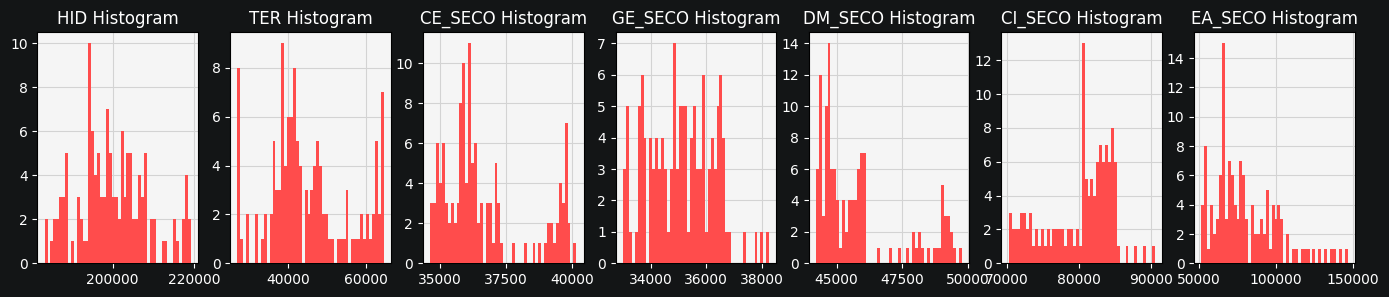

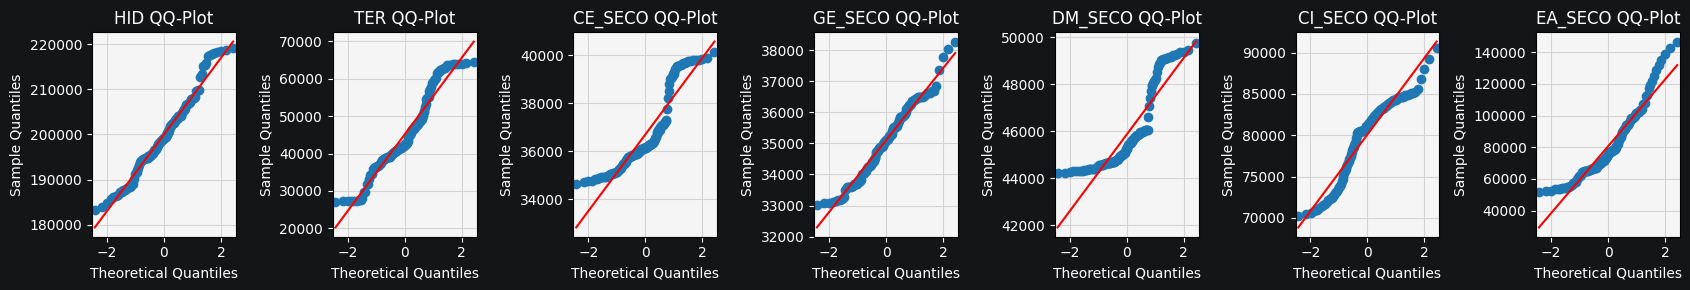

In [18]:
colors = ['#FF4C4C', '#8CD790', '#4D7EA8', '#E97451', '#F2B134', '#9368B7', '#5BC8AC', '#FFD700']

# Create a 2x4 grid for histograms and Q-Q plots
fig1 = plt.figure(figsize=(17, 3))
fig1.set_facecolor('#131516')

gs1 = gridspec.GridSpec(1, 7)
ax = []
for i in range(7):
    ax.append(plt.subplot(gs1[0, i]))
    ax[i].set_facecolor('whitesmoke')
    ax[i].grid(True, linestyle='-', linewidth=0.8, color='lightgrey')
    plt.hist(df0[cont[i]], bins=50, color=colors[0], zorder=4)
    ax[i].set_title( cont[i] + ' Histogram', color='white')
    ax[i].tick_params(axis='both', colors='white')


# ax2 = plt.subplot(gs1[0, 1])
# ax2.set_facecolor('whitesmoke')
# ax2.grid(True, linestyle='-', linewidth=0.8, color='lightgrey')
# plt.hist(df0['trip_miles'], bins=50, color=colors[1], zorder=4)
# ax2.set_title('Trip_Miles Histogram', color='white')
# ax2.tick_params(axis='both', colors='white')


# ax3 = plt.subplot(gs1[0, 2])
# ax3.set_facecolor('whitesmoke')
# ax3.grid(True, linestyle='-', linewidth=0.8, color='lightgrey')
# plt.hist(df0['price'], bins=50, color=colors[2], zorder=4)
# ax3.set_title('Price Histogram', color='white')
# ax3.tick_params(axis='both', colors='white')

# ax4 = plt.subplot(gs1[0, 3])
# ax4.set_facecolor('whitesmoke')
# ax4.grid(True, linestyle='-', linewidth=0.8, color='lightgrey')
# plt.hist(df0['cost'], bins=50, color=colors[4], zorder=4)
# ax4.set_title('Cost Histogram', color='white')
# ax4.tick_params(axis='both', colors='white')



fig2 = plt.figure(figsize=(17, 3))
fig2.set_facecolor('#131516')
gs2 = gridspec.GridSpec(1, 7)

# # QQ-Plots

ax2 = []
for i in range(7):
    ax2.append(plt.subplot(gs2[0, i]))
    ax2[i].set_facecolor('whitesmoke')
    ax2[i].grid(True, linestyle='-', linewidth=0.8, color='lightgrey')
    qqplot(df0[cont[i]], line='s', ax=ax2[i], color=colors[i], zorder=2)
    ax2[i].set_title(cont[i] + ' QQ-Plot', color='white')
    ax2[i].tick_params(axis='both', colors='white')
    ax2[i].set_ylabel('Sample Quantiles', color='white')
    ax2[i].set_xlabel('Theoretical Quantiles', color='white')

# ax6 = plt.subplot(gs2[0, 1])
# ax6.set_facecolor('whitesmoke')
# ax6.grid(True, linestyle='-', linewidth=0.8, color='lightgrey')
# qqplot(df0['trip_miles'], line='s', ax=ax6, color=colors[1], zorder=2)
# ax6.set_title('Trip_Miles QQ-Plot', color='white')
# ax6.tick_params(axis='both', colors='white')
# ax6.set_ylabel('Sample Quantiles', color='white')
# ax6.set_xlabel('Theoretical Quantiles', color='white')

# ax7 = plt.subplot(gs2[0, 2])
# ax7.set_facecolor('whitesmoke')
# ax7.grid(True, linestyle='-', linewidth=0.8, color='lightgrey')
# qqplot(df0['price'], line='s', ax=ax7, color=colors[2], zorder=2)
# ax7.set_title('Price QQ-Plot', color='white')
# ax7.tick_params(axis='both', colors='white')
# ax7.set_ylabel('Sample Quantiles', color='white')
# ax7.set_xlabel('Theoretical Quantiles', color='white')

# ax8 = plt.subplot(gs2[0, 3])
# ax8.set_facecolor('whitesmoke')
# ax8.grid(True, linestyle='-', linewidth=0.8, color='lightgrey')
# qqplot(df0['cost'], line='s', ax=ax8, color=colors[3], zorder=2)
# ax8.set_title('Cost QQ-Plot', color='white')
# ax8.tick_params(axis='both', colors='white')
# ax8.set_ylabel('Sample Quantiles', color='white')
# ax8.set_xlabel('Theoretical Quantiles', color='white')

plt.tight_layout()
plt.show()

In [19]:
from scipy.stats import anderson

print(f"{'DISTRIBUTION':<15}{'%sig':<10}{'stat':<12}{'crit-val':<10}"
      f"{'result':<10}\n")

for var in cont:
    test = anderson(df0[var])
    # Loop through test results and unpack the sig.levels and crit-vals
    for i in range(len(test.critical_values)):
        sig_lev, cv = test.significance_level[i], test.critical_values[i]
        # Check if test.stat is < crit-val
        result = 'Fail to reject' if test.statistic < cv else 'Reject'
        # Print results in tabular format
        print(f"{var:<15}{sig_lev:<10}{test.statistic:<12.3f}{cv:<10}"
              f"{result:<10}")
        if i is 4:
            print('\n')

DISTRIBUTION   %sig      stat        crit-val  result    

HID            15.0      0.667       0.559     Reject    
HID            10.0      0.667       0.637     Reject    
HID            5.0       0.667       0.764     Fail to reject
HID            2.5       0.667       0.892     Fail to reject
HID            1.0       0.667       1.061     Fail to reject


TER            15.0      2.450       0.559     Reject    
TER            10.0      2.450       0.637     Reject    
TER            5.0       2.450       0.764     Reject    
TER            2.5       2.450       0.892     Reject    
TER            1.0       2.450       1.061     Reject    


CE_SECO        15.0      7.377       0.559     Reject    
CE_SECO        10.0      7.377       0.637     Reject    
CE_SECO        5.0       7.377       0.764     Reject    
CE_SECO        2.5       7.377       0.892     Reject    
CE_SECO        1.0       7.377       1.061     Reject    


GE_SECO        15.0      0.755       0.559     Reject

<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-19-1e6f3f796dc6>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 4:


In [20]:
from scipy.stats import shapiro

# Create header for tabular output
print(f"{'DISTRIBUTION':<15}{'stat':<10}{'p-val':<12}{'result':<10}\n")
# Loop through continuous random variable name list
for dist in cont:
    # Perform test
    stat, p_val = shapiro(df0[dist])
    # Check result
    result = 'Reject (not normally distributed)' if p_val > 0.05 else 'Fail to Reject(normally distributed)'
    # Print tabular output from test
    print(f"{dist:<15}{stat:<10.3f}{p_val:<12.5f}{result:<10}\n")

DISTRIBUTION   stat      p-val       result    

HID            0.975     0.01741     Fail to Reject(normally distributed)

TER            0.942     0.00003     Fail to Reject(normally distributed)

CE_SECO        0.852     0.00000     Fail to Reject(normally distributed)

GE_SECO        0.976     0.02159     Fail to Reject(normally distributed)

DM_SECO        0.804     0.00000     Fail to Reject(normally distributed)

CI_SECO        0.927     0.00000     Fail to Reject(normally distributed)

EA_SECO        0.918     0.00000     Fail to Reject(normally distributed)

LPC_SECO       0.943     0.00004     Fail to Reject(normally distributed)

PIB            0.944     0.00004     Fail to Reject(normally distributed)



In [22]:
from scipy.stats import pearsonr

# Set header for tabular output
print(f"{'RANDOM VARIABLES':<25}{'corr':<10}{'p-value':<10}\n")
# Iterate over continuous features list
for i in range(len(cont)):
    # Set output variable
    y_output = cont[i]
    # Loop through continuous features list again
    for j in range(len(cont)):
        # Set input variable
        x_input = cont[j]
        # Check for equality, if equal, skip iteration
        if y_output == x_input:
            continue
        # If not equal, grab coefficient and p-value
        else:
            corr, p_val = pearsonr(df0[x_input], df0[y_output])
            # Print results in tabular output
            limit = 0.4
            if((corr > limit) or (corr < -limit)):
              print(f"{y_output + '-vs-' + x_input:<25}"
                    f"{corr:<10.2f}{p_val:<10.4f}")

RANDOM VARIABLES         corr      p-value   

HID-vs-TER               -0.88     0.0000    
HID-vs-EA_SECO           0.80      0.0000    
HID-vs-LPC_SECO          -0.59     0.0000    
TER-vs-HID               -0.88     0.0000    
TER-vs-EA_SECO           -0.76     0.0000    
TER-vs-LPC_SECO          0.67      0.0000    
CE_SECO-vs-GE_SECO       -0.43     0.0000    
CE_SECO-vs-DM_SECO       0.95      0.0000    
CE_SECO-vs-CI_SECO       0.58      0.0000    
CE_SECO-vs-PIB           0.90      0.0000    
GE_SECO-vs-CE_SECO       -0.43     0.0000    
GE_SECO-vs-DM_SECO       -0.59     0.0000    
GE_SECO-vs-LPC_SECO      -0.41     0.0000    
DM_SECO-vs-CE_SECO       0.95      0.0000    
DM_SECO-vs-GE_SECO       -0.59     0.0000    
DM_SECO-vs-PIB           0.83      0.0000    
CI_SECO-vs-CE_SECO       0.58      0.0000    
CI_SECO-vs-PIB           0.78      0.0000    
EA_SECO-vs-HID           0.80      0.0000    
EA_SECO-vs-TER           -0.76     0.0000    
EA_SECO-vs-LPC_SECO      -0.79   

In [ ]:
from scipy.stats import linregress
import numpy as np

# Header for tabular output
print(f"{'RANDOM VARIABLES':<25}{'slope':<10}{'inter':<10}"
      f"{'r-squ':<10}{'p-value':<10}{'std-err':<10}\n")
# Loop through continuous features for y
for i in range(0, len(cont)):
    y_output = df0[cont[i]].values
    # Loop through continuous features for x
    for j in range(0, len(cont)):
        x_input = df0[cont[j]].values
        # If var names are equal skip iteration
        if np.array_equal(x_input, y_output):

            continue
        # If var names not equal perform regression and print tabular output
        else:
            slope, inter, r_val, p_val, stder = linregress(x_input, y_output)
            if p_val < 0.05:
              print(f"{cont[i] + '-vs-' + cont[j]:<25}{slope:<10.2f}"
                    f"{inter:<10.2f}{r_val**2:<10.3f}{p_val:<10.5f}"
                    f"{stder:<10.3f}")

RANDOM VARIABLES         slope     inter     r-squ     p-value   std-err   

EOL-vs-SOL               1.66      15858.40  0.463     0.00000   0.150     
EOL-vs-SIN-DM            0.18      -39072.41 0.238     0.00000   0.027     
EOL-vs-SIN-EA            0.02      9322.78   0.081     0.00056   0.006     
EOL-vs-PLD               -24.15    26969.98  0.087     0.00032   6.545     
HID-vs-NUC               5.14      163470.19 0.085     0.00040   1.415     
HID-vs-TER               -0.56     226279.86 0.092     0.00021   0.148     
HID-vs-SIN-DM            0.49      35304.60  0.496     0.00000   0.042     
HID-vs-SIN-EA            0.06      167488.49 0.189     0.00000   0.010     
HID-vs-PLD               -48.57    213831.28 0.096     0.00016   12.508    
NUC-vs-HID               0.02      4160.86   0.085     0.00040   0.005     
NUC-vs-SIN-DM            0.01      2964.67   0.114     0.00004   0.003     
SOL-vs-EOL               0.28      -2738.71  0.463     0.00000   0.025     
SOL-vs-TER 